# Proyecto Final MEIA - Módulo 1

## 🧠 Optimización de Regresión Lineal con Descenso del Gradiente


In [1]:
# --- 1. Importar librerías y cargar datos ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [ ]:
# Cargar el dataset Iris
iris = load_iris(as_frame=True)
# Convertir a DataFrame
df = iris.frame
# Renombrar las columnas para facilitar su uso
df.columns = [col.lower().replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [ ]:
# Seleccionamos las variables independientes (X) y la dependiente (y)
# X tendrá 3 columnas: sepal_width, petal_width, sepal_length
# y tendrá una sola columna: petal_length
X = df[['sepal_width', 'petal_width', 'sepal_length']].values   # variables de entrada
y = df['petal_length'].values.reshape(-1, 1)                    # variable a predecir (convertida a columna)

print("Shape X:", X.shape, "Shape y:", y.shape)  # imprimimos las dimensiones para comprobar


Shape X: (150, 3) Shape y: (150, 1)


In [ ]:
# --- 2. Función de Costo (MSE) ---

def compute_cost(X, y, W, b):
    """
    Calcula el error cuadrático medio (MSE) entre las predicciones y los valores reales.

    X: matriz de características (n muestras x m variables)
    y: vector de valores reales (n muestras x 1)
    W: vector de pesos/coeficientes (m x 1)
    b: bias/sesgo (número)
    """
    m = X.shape[0]               # m = número de muestras (filas)
    y_pred = X @ W + b           # Calculamos las predicciones (multiplicación de matrices + bias)
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Fórmula del costo: promedio de los cuadrados de los errores
    return cost

In [ ]:
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    """
    Implementa el algoritmo de descenso del gradiente para regresión lineal múltiple.

    X: matriz de características (n x m)
    y: vector de valores reales (n x 1)
    alpha: tasa de aprendizaje (cuánto se ajustan los parámetros en cada paso)
    epochs: número de iteraciones del algoritmo

    Devuelve: los pesos entrenados W, el bias entrenado b, y una lista con el valor del costo en cada época
    """
    m, n = X.shape              # m: muestras, n: variables/características
    W = np.zeros((n, 1))        # Inicializamos los pesos en cero (vector columna)
    b = 0                       # Inicializamos el bias en cero
    costs = []                  # Para guardar cómo va evolucionando el costo

    # Ciclo principal: iteramos tantas veces como indique 'epochs'
    for epoch in range(epochs):
        # 1. Hacemos las predicciones del modelo actual
        y_pred = X @ W + b      # @ es multiplicación de matriz, suma el bias a todas las filas

        # 2. Calculamos el error (predicción - valor real)
        error = y_pred - y

        # 3. Calculamos los gradientes (derivadas parciales del costo respecto a W y b)
        dW = (1/m) * (X.T @ error)   # Gradiente respecto a los pesos
        db = (1/m) * np.sum(error)   # Gradiente respecto al bias

        # 4. Actualizamos los parámetros en la dirección que reduce el error
        W -= alpha * dW      # Restamos el gradiente multiplicado por la tasa de aprendizaje
        b -= alpha * db

        # 5. Calculamos y almacenamos el nuevo costo para monitorear el progreso
        cost = compute_cost(X, y, W, b)
        costs.append(cost)

        # 6. Opcional: cada 100 épocas, imprimimos el costo para ver cómo mejora
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Costo = {cost:.4f}")
    return W, b, costs

In [18]:
# --- 4. Entrenamiento del modelo ---
alpha = 0.01  # Tasa de aprendizaje
epochs = 1000 # Número de iteraciones
W, b, costs = gradient_descent(X, y, alpha, epochs) # Ejecutamos el entrenamiento
print("Pesos finales:", W.ravel(), "Bias:", b)

Epoch 0: Costo = 3.1475
Epoch 100: Costo = 0.2828
Epoch 200: Costo = 0.1089
Epoch 300: Costo = 0.0651
Epoch 400: Costo = 0.0540
Epoch 500: Costo = 0.0511
Epoch 600: Costo = 0.0504
Epoch 700: Costo = 0.0501
Epoch 800: Costo = 0.0500
Epoch 900: Costo = 0.0499
Pesos finales: [-0.71339682  1.40626823  0.74551931] Bias: -0.10219937214494418


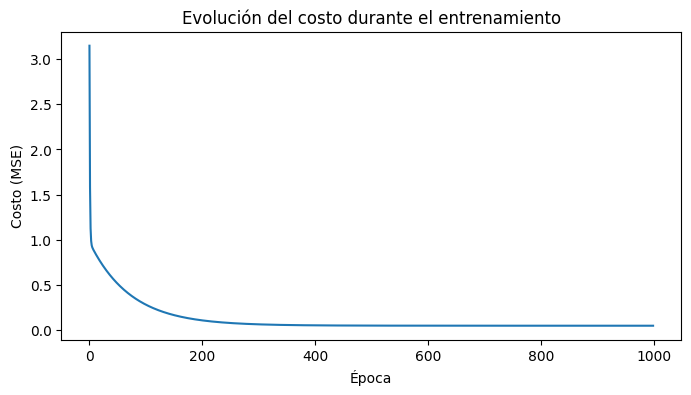

In [19]:
# --- 5. Visualización de la función de costo (MSE) durante el entrenamiento ---
plt.figure(figsize=(8,4))
plt.plot(costs)
plt.xlabel("Época")
plt.ylabel("Costo (MSE)")
plt.title("Evolución del costo durante el entrenamiento")
plt.show()

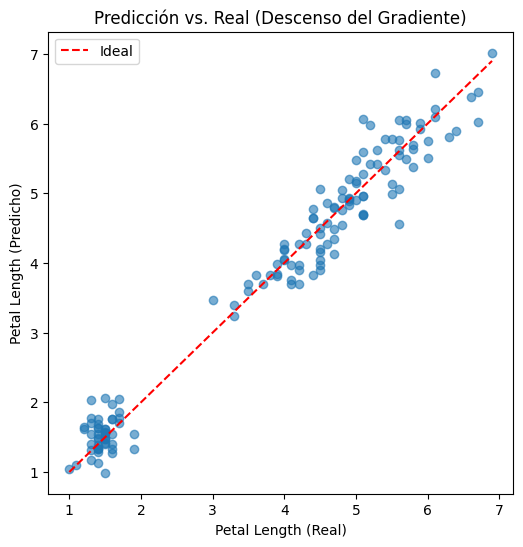

In [20]:
# --- 6. Gráfico: valores predichos vs. reales ---

# Calculamos las predicciones finales del modelo entrenado
y_pred = X @ W + b

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.6) # Puntos: valor real vs valor predicho
# Línea ideal (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="Ideal")
plt.xlabel("Petal Length (Real)")
plt.ylabel("Petal Length (Predicho)")
plt.title("Predicción vs. Real (Descenso del Gradiente)")
plt.legend()
plt.show()

Pesos sklearn: [[-0.64601244  1.44679341  0.72913845]]
Bias sklearn: [-0.2627112]


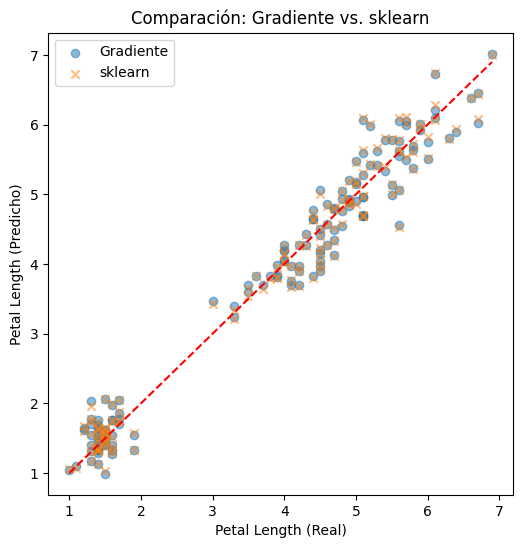

In [21]:
# --- 7. Comparación con LinearRegression de scikit-learn ---
lr = LinearRegression()
lr.fit(X, y)
y_pred_skl = lr.predict(X)

print("Pesos sklearn:", lr.coef_)
print("Bias sklearn:", lr.intercept_)

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5, label="Gradiente") # Nuestras predicciones
plt.scatter(y, y_pred_skl, alpha=0.5, label="sklearn", marker='x')  # sklearn
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Petal Length (Real)")
plt.ylabel("Petal Length (Predicho)")
plt.title("Comparación: Gradiente vs. sklearn")
plt.legend()
plt.show()